#### __Aluno:__ Yago Angelini Candido
#### __RA:__ 125111369950

***
# __Dataset__: Credit Score

- Link (Kaggle): https://www.kaggle.com/datasets/sujithmandala/credit-score-classification-dataset

- Qual a fonte de dados? Eles são reais?
    - Sim. Os dados foram coletados de uma variedade de fontes, incluindo principalmente pesquisas e formulários. NÃO FORAM previamente limpos e preparados.
    - 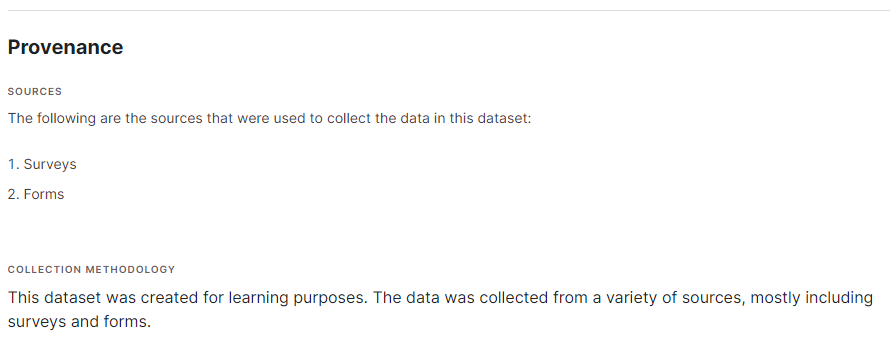

## Contexto

Conjunto de dados de classificação de pontuação de crédito fácil para classificação múltipla.

Este conjunto de dados contém informações sobre uma amostra de mais de 100 pessoas em todo o mundo. Os dados incluem as seguintes informações:

1. Idade
1. Gênero
1. Renda
1. Educação
1. Estado civil
1. Número de filhos
1. Casa própria
1. Pontuação de crédito

---

# 💡📈 __Projeto de Data Science__

***
### 1. Problema
Desenvolver um modelo que consiga prever a classificação de pontuação de crédito para um novo cliente.

***
### 2 e 3. Compreensão e Preparação dos Dados

In [440]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wrs
wrs.filterwarnings('ignore')  # para ignorar avisos


In [441]:
# Criar dataFrame
df = pd.read_csv(
                "Credit Score Classification Dataset.csv",
                header=0,
                sep=",",
                names=['Idade',
                       'Genero',
                       'Renda',
                       'Educacao',
                       'EstadoCivil',
                       'QTD_Filhos',
                       'CasaPropria',
                       'Pontuacao'])


In [442]:
# Visualizar dataFrame
df


,Idade,Genero,Renda,Educacao,EstadoCivil,QTD_Filhos,CasaPropria,Pontuacao
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High


In [443]:
# Estrutura do dataFrame
df.shape


(164, 8)

In [444]:
# Descrição do dataFrame
df.describe()


,Idade,Renda,QTD_Filhos
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


In [445]:
# Colunas do dataFrame
df.columns


Index(['Idade', 'Genero', 'Renda', 'Educacao', 'EstadoCivil', 'QTD_Filhos',
       'CasaPropria', 'Pontuacao'],
      dtype='object')

In [446]:
# Informações do dataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Idade        164 non-null    int64 
 1   Genero       164 non-null    object
 2   Renda        164 non-null    int64 
 3   Educacao     164 non-null    object
 4   EstadoCivil  164 non-null    object
 5   QTD_Filhos   164 non-null    int64 
 6   CasaPropria  164 non-null    object
 7   Pontuacao    164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


### Gráficos

<Axes: xlabel='Genero', ylabel='count'>

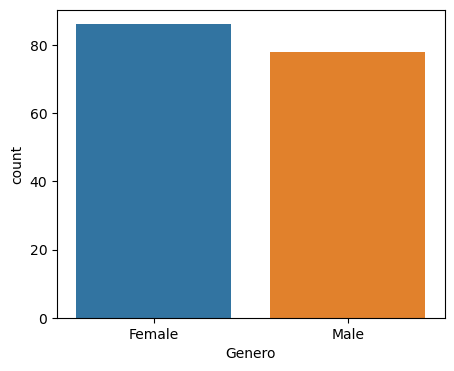

In [447]:
plt.figure(figsize=(5, 4))
sns.countplot(x=df.Genero)

<Axes: xlabel='Educacao', ylabel='count'>

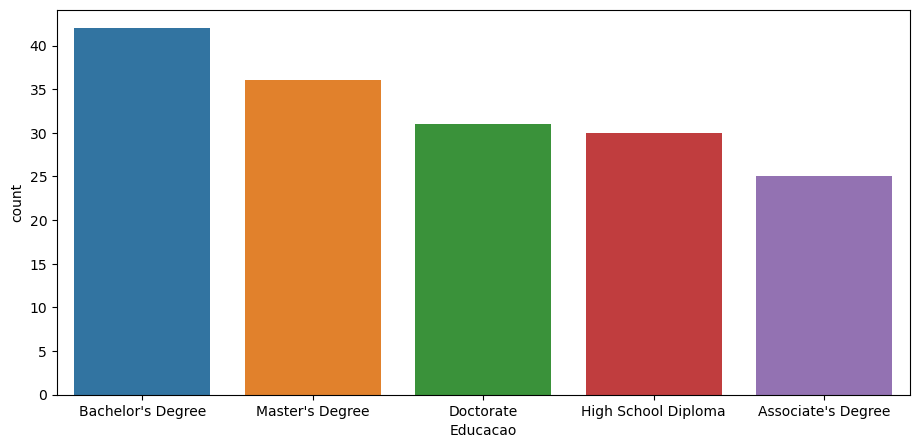

In [448]:
plt.figure(figsize=(11, 5))
sns.countplot(x=df.Educacao)

<Axes: xlabel='EstadoCivil', ylabel='count'>

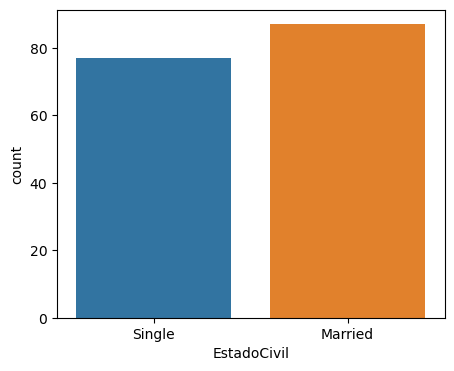

In [449]:
plt.figure(figsize=(5, 4))
sns.countplot(x=df.EstadoCivil)

<Axes: xlabel='QTD_Filhos', ylabel='count'>

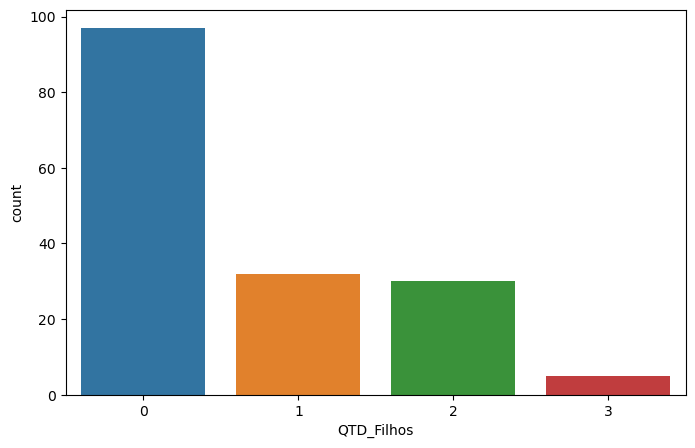

In [450]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df.QTD_Filhos)

<Axes: xlabel='CasaPropria', ylabel='count'>

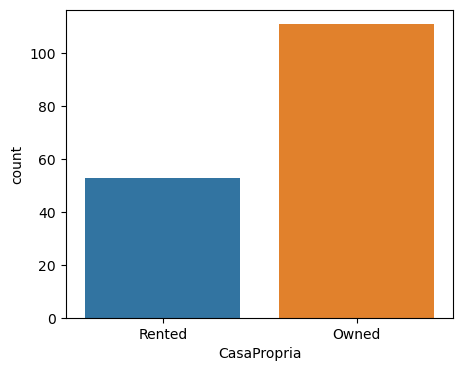

In [451]:
plt.figure(figsize=(5, 4))
sns.countplot(x=df.CasaPropria)

<Axes: xlabel='Pontuacao', ylabel='count'>

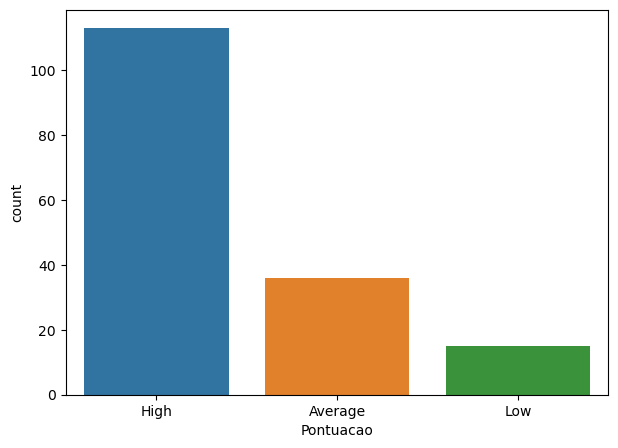

In [452]:
plt.figure(figsize=(7, 5))
sns.countplot(x=df.Pontuacao)

In [453]:
df.Pontuacao.value_counts()

High       113
Average     36
Low         15
Name: Pontuacao, dtype: int64

### Factorize

A Random Forest não consegue prever texto, apenas números. Então precisamos converter nossos atributos para o tipo numérico.

In [454]:
#Converter a coluna Genero (factorize)
genero = pd.factorize(df["Genero"])
df["Genero"] = genero[0]
print("Descrições do vetor: " + str(genero[1])) #Index(['Female', 'Male']
print("Novo tipo da coluna [Genero]: " + str(df.Genero.dtype))
df

Descrições do vetor: Index(['Female', 'Male'], dtype='object')
Novo tipo da coluna [Genero]: int64


,Idade,Genero,Renda,Educacao,EstadoCivil,QTD_Filhos,CasaPropria,Pontuacao
0,25,0,50000,Bachelor's Degree,Single,0,Rented,High
1,30,1,100000,Master's Degree,Married,2,Owned,High
2,35,0,75000,Doctorate,Married,1,Owned,High
3,40,1,125000,High School Diploma,Single,0,Owned,High
4,45,0,100000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
159,29,0,27500,High School Diploma,Single,0,Rented,Low
160,34,1,47500,Associate's Degree,Single,0,Rented,Average
161,39,0,62500,Bachelor's Degree,Married,2,Owned,High
162,44,1,87500,Master's Degree,Single,0,Owned,High


In [455]:
#Converter as outras colunas (factorize)
educacao = pd.factorize(df["Educacao"])
estadoCivil = pd.factorize(df["EstadoCivil"])
casaPropria = pd.factorize(df["CasaPropria"])
pontuacao = pd.factorize(df["Pontuacao"])
df["Educacao"] = educacao[0]
df["EstadoCivil"] = estadoCivil[0]
df["CasaPropria"] = casaPropria[0]
df["Pontuacao"] = pontuacao[0]
df

,Idade,Genero,Renda,Educacao,EstadoCivil,QTD_Filhos,CasaPropria,Pontuacao
0,25,0,50000,0,0,0,0,0
1,30,1,100000,1,1,2,1,0
2,35,0,75000,2,1,1,1,0
3,40,1,125000,3,0,0,1,0
4,45,0,100000,0,1,3,1,0
...,...,...,...,...,...,...,...,...
159,29,0,27500,3,0,0,0,2
160,34,1,47500,4,0,0,0,1
161,39,0,62500,0,1,2,1,0
162,44,1,87500,1,0,0,1,0


In [456]:
# Converter colunas categóricas, de int para categórica
df["Genero"] = df["Genero"].astype("category")
df["Educacao"] = df["Educacao"].astype("category")
df["EstadoCivil"] = df["EstadoCivil"].astype("category")
df["CasaPropria"] = df["CasaPropria"].astype("category")
df["Pontuacao"] = df["Pontuacao"].astype("category")

In [457]:
# Checagem da coluna categórica
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Idade        164 non-null    int64   
 1   Genero       164 non-null    category
 2   Renda        164 non-null    int64   
 3   Educacao     164 non-null    category
 4   EstadoCivil  164 non-null    category
 5   QTD_Filhos   164 non-null    int64   
 6   CasaPropria  164 non-null    category
 7   Pontuacao    164 non-null    category
dtypes: category(5), int64(3)
memory usage: 5.5 KB


#### Valores NaN

In [458]:
# Checagem de valores NaN
df.isna().sum()


Idade          0
Genero         0
Renda          0
Educacao       0
EstadoCivil    0
QTD_Filhos     0
CasaPropria    0
Pontuacao      0
dtype: int64

#### Trabalhando com Outliers

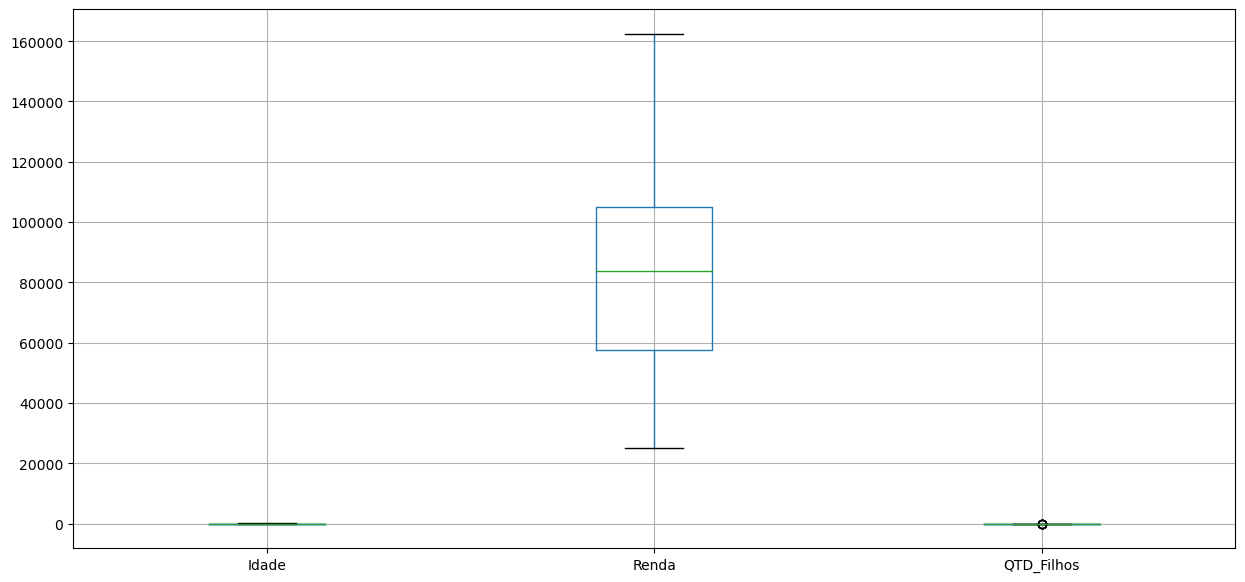

In [459]:
# Checagem de outliers via boxplot
plt.figure(figsize=(15, 7))
df.boxplot()
plt.show()


In [460]:
# Algo de errado com a coluna QTD_Filhos?
df.QTD_Filhos.describe()


count    164.000000
mean       0.652439
std        0.883346
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: QTD_Filhos, dtype: float64

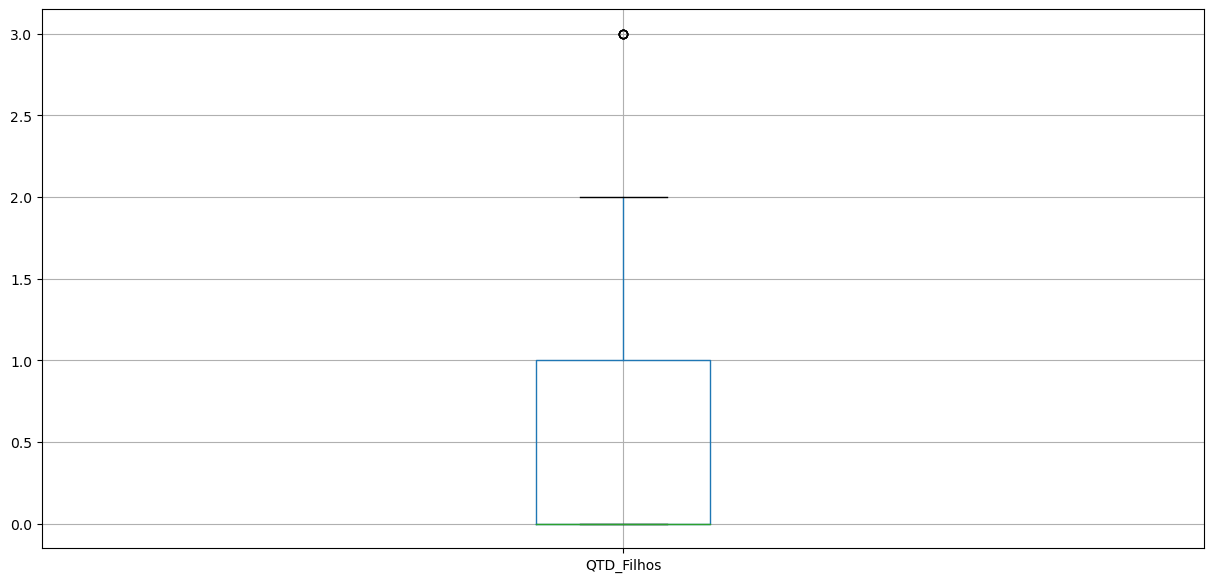

In [461]:
# Checagem de outliers via boxplot da coluna [QTD_Filhos]
plt.figure(figsize=(15, 7))
df.loc[:, df.columns == 'QTD_Filhos'].boxplot()
plt.show()


In [462]:
# Quantos clientes tem 3 filhos? Isso é mesmo um outlier?
df[df.QTD_Filhos == 3].value_counts().sum()

5

***
### 4. Modelagem

In [463]:
# Divisão dos dados em treino e teste (com sub_df)
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'Pontuacao']
y = df["Pontuacao"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.28, random_state=42)


#### Árvores de Decisão
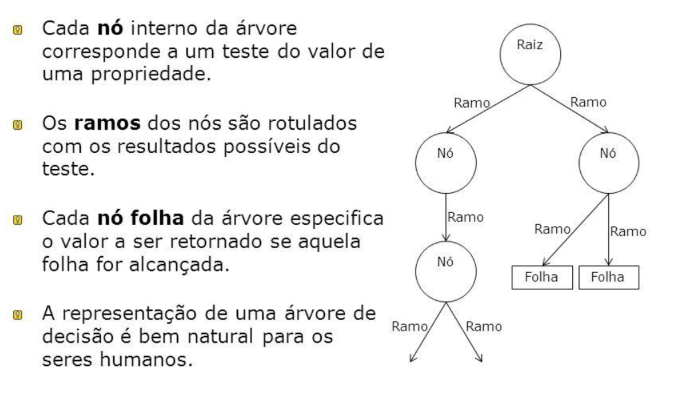   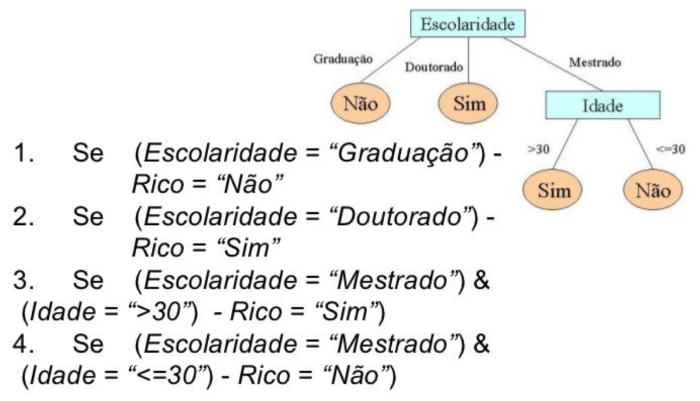

#### Random Forest Classifier
Foi desenvolvido pelo professor Leo Breiman em 2001.

É um algoritmo de aprendizagem supervisionada:
- Técnica de machine learning na qual você treina um modelo usando dados que incluem as características e os valores conhecidos para o rótulo, de modo que o modelo aprende a ajustar as combinações de recursos para o rótulo. Em seguida, após a conclusão do treinamento, você pode usar o modelo treinado para prever rótulos para novos itens para os quais o rótulo é desconhecido.

A “floresta” que ele cria é uma combinação (ensemble) de árvores de decisão, na maioria dos casos treinados com o método de bagging;
- Usando o método bagging, cada árvore de decisão no conjunto é configurada usando uma amostra com substituição dos dados de treinamento. Estatisticamente falando, é provável que a amostra tenha cerca de 64% das instâncias aparecendo pelo menos uma vez na amostra, essas são chamadas de instâncias in-bag. O restante das instâncias, que é de cerca de 36%, são chamadas de instâncias fora do saco;
- Durante a configuração das árvores individuais na Random Forest, um certo grau de randomização também é aplicado ao selecionar o melhor nó para dividir;
- A seleção de dados e features é aleatória
- Várias árvores na floresta

Exemplos de Aplicação:
- Análise de Fraude de cartão de crédito (Fraude/Não)
- Diagnóstico de Doença (Doente/Saudável)

Referência Bibliográfica: https://drjariel.medium.com/historical-developments-of-random-forest-41492deb6737

In [464]:
from sklearn.ensemble import RandomForestClassifier

#Parâmetros selecionados pelo RandomizedSearchCV
modelo = RandomForestClassifier(n_estimators= 653,
                                min_samples_split= 10,
                                min_samples_leaf= 2,
                                max_features= 'log2',
                                max_depth= 111,
                                bootstrap= True,
                                n_jobs=-1)


#### RandomizedSearch (Ajuste de HiperParâmetros)
Pesquisa aleatória de hiperparâmetros.

RandomizedSearchCV possui um método de “fit” e de “score”. Também implementa “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” e “inverse_transform” se forem implementadas no estimador utilizado.

Os parâmetros do estimador usados ​​para aplicar esses métodos são otimizados por busca validada cruzada sobre configurações de parâmetros.

Em contraste com GridSearchCV, nem todos os valores de parâmetro são testados, mas um número fixo de configurações de parâmetro é amostrado das distribuições especificadas. O número de configurações de parâmetro que são tentadas é dado por n_iter.

Se todos os parâmetros forem apresentados como uma lista, a amostragem sem substituição é realizada. Se pelo menos um parâmetro for dado como uma distribuição, a amostragem com reposição é usada. É altamente recomendável usar distribuições contínuas para parâmetros contínuos.

Referência Bibliográfica: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [465]:
# from sklearn.model_selection import RandomizedSearchCV

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 100)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt', 'log2', 'None']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(5, 150, num = 50)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# modelo = RandomizedSearchCV(estimator=RandomForestClassifier(),
#                             param_distributions=random_grid,
#                             n_iter=500,
#                             cv=3,
#                             scoring='accuracy',
#                             n_jobs=-1,
#                             verbose=3,
#                             random_state=42)


In [466]:
#Treino e Predição do modelo
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)


In [467]:
# Resultados de ajuste de hiperparâmetros

# print(" RESULTADOS RANDOMIZED SEARCH " )
# print("\n The best parameters across ALL searched params:")
# modelo.best_params_
# print("\n The best estimator across ALL searched params:\n",modelo.best_estimator_)
# print("\n The best score across ALL searched params:\n",modelo.best_score_)
# print("\n The best index across ALL searched params:\n",modelo.best_index_)
# print("\n The error_score across ALL searched params:\n",modelo.error_score)
# print("\n The train_score across ALL searched params:\n",modelo.return_train_score)


***
### 5. Avaliação

In [468]:
#Reconverter a coluna [Pontuacao], que foi fatorizada para numérica, de volta para Texto
reversefactor = dict(zip(range(3),pontuacao[1])) #transformando as categorias originais da coluna em um dicionário
y_test = np.vectorize(reversefactor.get)(y_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)

In [469]:
#print da crosstab, uma alternativa a Matriz de Confusão
pd.crosstab(y_test, y_pred, rownames=['REAL Pontuação'], colnames=['PREDITA Pontuação'])

PREDITA Pontuação,Average,High,Low
REAL Pontuação,,,
Average,8,2,0
High,1,28,0
Low,0,0,7


In [470]:
pd.crosstab(y_test, y_pred, rownames=['REAL Pontuação'], colnames=['PREDITA Pontuação'], normalize=True)

PREDITA Pontuação,Average,High,Low
REAL Pontuação,,,
Average,0.173913,0.043478,0.000000
High,0.021739,0.608696,0.000000
Low,0.000000,0.000000,0.152174


#### Matriz de Confusão
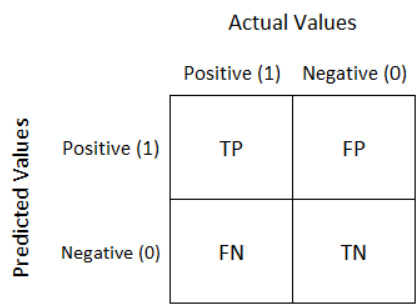
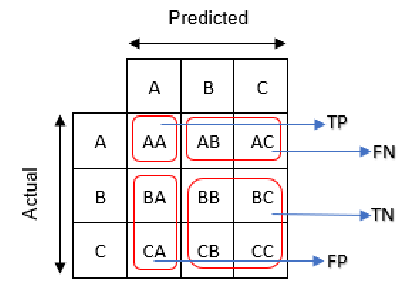

No campo do Aprendizado de Máquina uma matriz de confusão é uma tabela que permite a visualização do desempenho de um algoritmo de classificação.

In [471]:
# Matriz de Confusão
# nos diz quantos verdadeiros positivos, falsos positivos, verdadeiros negativos e negativos positivos temos
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y_test, y_pred, normalize="true")

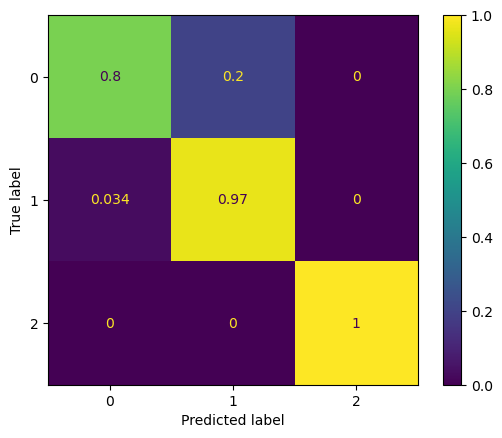

In [472]:
# plotar a confusion matriz
from sklearn.metrics import ConfusionMatrixDisplay

mc = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusao, display_labels=modelo.classes_)
mc.plot()
plt.show()


#### Classification Report
A __PRECISION__ é a razão TP / (TP + FP) onde TP é o número de verdadeiros positivos e FP o número de falsos positivos. A precision é intuitivamente a capacidade do classificador não rotular uma amostra negativa como positiva. De todos os valores preditos como positivos, a PRECISION define a proporção de valores realmente positivos acertados.

O __RECALL__ é a razão TP / (TP + FN) onde TP é o número de verdadeiros positivos e FN o número de falsos negativos. O RECALL é intuitivamente a habilidade do classificador em encontrar todas as amostras positivas. De todos os valores realmente positivos, o RECALL define a proporção de acertos.

A pontuação __F1-SCORE__ pode ser interpretada como uma média harmônica ponderada da PRECISION e RECALL, onde uma pontuação F1-SCORE atinge seu melhor valor em 1 e pior pontuação em 0.

O __SUPPORT__ é o número de ocorrências de cada classe em y_true.

In [473]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

     Average       0.89      0.80      0.84        10
        High       0.93      0.97      0.95        29
         Low       1.00      1.00      1.00         7

    accuracy                           0.93        46
   macro avg       0.94      0.92      0.93        46
weighted avg       0.93      0.93      0.93        46



#### Accuracy Score

In [474]:
# calculo do Score
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
score


0.9347826086956522

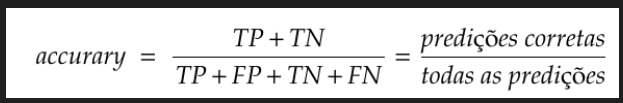

***
### ✅ __[MELHOR RESULTADO]__

__Accuracy Score:__ 0.93

***
## 🔍 OVERFITTING

Overfitting é um conceito em ciência de dados, que ocorre quando um modelo estatístico se ajusta exatamente aos seus dados de treinamento. Quando isso acontece, o algoritmo infelizmente não pode funcionar com precisão em dados não vistos, anulando seu propósito. A generalização de um modelo para novos dados é o que nos permite usar algoritmos de aprendizado de máquina todos os dias para fazer previsões e classificar dados. Isso pode ocorrer, principalmente, quando temos poucos dados no nosso dataset.

__No caso desse dataset, por mais que sejam dados reais, a estrutura dele possui poucas entradas (164x8). Entretanto, considerei ainda assim pegar esse dataset para mostrar que na vida real processos de data science são complicados, por conta de ter dados insuficientes, e ainda mais, é difícil obter dados que nos permitam fazer análises e predições através deles. Pesquisas são caras, e geralmente, possuem dados faltantes, erros de cadastro, etc.__

__Ainda que a base seja pequena, o modelo teve uma boa acurácia tanto para os dados de teste quanto para os dados de treinamento, mas temos que observar bem com novas entradas para saber se o algoritmo não está sofrendo overfitting, ou seja, se ajustando exatamente aos dados de treinamento, sem aceitar quaisquer outros.__